MSBD 566 Midterm Project Notebook

Anemia Severity Among Reproductive-Age Women

Kelsi Dial

 Setup

In [1]:
# Core libraries
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Display options
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

print("Setup complete.")

Setup complete.


Load NHANES data (DEMO_J and CBC_J)



In [2]:
# Update this path if your files live somewhere else.
DATA_DIR = "."  # current folder by default

demo_path = os.path.join(DATA_DIR, "DEMO_J.xpt")
cbc_path  = os.path.join(DATA_DIR, "CBC_J.xpt")

for p in [demo_path, cbc_path]:
    if not os.path.exists(p):
        raise FileNotFoundError(f"Missing file: {p}. Put the XPT file in {DATA_DIR} or update DATA_DIR.")

# Read SAS transport files
demo = pd.read_sas(demo_path, format="xport")
cbc  = pd.read_sas(cbc_path,  format="xport")

print("DEMO_J shape:", demo.shape)
print("CBC_J  shape:", cbc.shape)

demo.head()

DEMO_J shape: (9254, 46)
CBC_J  shape: (8366, 22)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,2.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.000000e+00,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,2.0,NaN,1.0,1.0,NaN,15.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7.0,7.0,5.397605e-79,3.000000e+00,5.397605e-79,1.0,3.0,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


Select variables + merge on SEQN

In [3]:
needed_demo = ["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH1"]
needed_cbc  = ["SEQN", "LBXHGB"]

missing_demo = [c for c in needed_demo if c not in demo.columns]
missing_cbc  = [c for c in needed_cbc if c not in cbc.columns]

if missing_demo:
    raise KeyError(f"Missing columns in DEMO_J: {missing_demo}")
if missing_cbc:
    raise KeyError(f"Missing columns in CBC_J: {missing_cbc}")

demo_sub = demo[needed_demo].copy()
cbc_sub  = cbc[needed_cbc].copy()

df = demo_sub.merge(cbc_sub, on="SEQN", how="inner")

print("Merged shape:", df.shape)
df.head()

Merged shape: (8366, 5)


,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,LBXHGB
0,93703.0,2.0,2.0,5.0,NaN
1,93704.0,1.0,2.0,3.0,13.1
2,93705.0,2.0,66.0,4.0,11.9
3,93706.0,1.0,18.0,5.0,16.3
4,93707.0,1.0,13.0,5.0,14.5


Definitions
- Reproductive age: 18–50 (for this project)
- Anemia (binary): hemoglobin < 12 g/dL (adult women threshold)


In [4]:
# Filter: female (RIAGENDR == 2) and age 18-50
df_clean = df.copy()

df_clean = df_clean[df_clean["RIAGENDR"] == 2]
df_clean = df_clean[(df_clean["RIDAGEYR"] >= 18) & (df_clean["RIDAGEYR"] <= 50)]

# Drop missing hemoglobin
df_clean = df_clean.dropna(subset=["LBXHGB"])

# Create anemia indicator
df_clean["anemia"] = (df_clean["LBXHGB"] < 12).astype(int)

print("Analytic cohort shape:", df_clean.shape)
df_clean[["RIDAGEYR", "RIDRETH1", "LBXHGB", "anemia"]].head()

Analytic cohort shape: (1353, 6)


,RIDAGEYR,RIDRETH1,LBXHGB,anemia
41,25.0,4.0,12.5,0
48,26.0,4.0,13.0,0
59,36.0,2.0,12.8,0
67,41.0,3.0,13.9,0
68,47.0,5.0,12.9,0


Descriptive statistics

In [5]:
# Summary stats for hemoglobin
summary = df_clean["LBXHGB"].describe()
print(summary)

# Anemia prevalence
anemia_counts = df_clean["anemia"].value_counts().sort_index()
anemia_pct = (anemia_counts / anemia_counts.sum()) * 100

print("\nAnemia counts:")
print(anemia_counts)

print("\nAnemia prevalence (%):")
print(anemia_pct.round(2))

count    1353.000000
mean       13.064819
std         1.327454
min         6.400000
25%        12.500000
50%        13.200000
75%        13.900000
max        16.500000
Name: LBXHGB, dtype: float64

Anemia counts:
anemia
0    1149
1     204
Name: count, dtype: int64

Anemia prevalence (%):
anemia
0    84.92
1    15.08
Name: count, dtype: float64


Exploratory Data Analysis (EDA)


In [6]:
# Create output folder for figures
FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)

print("Figures will save to:", os.path.abspath(FIG_DIR))

Figures will save to: /content/figures


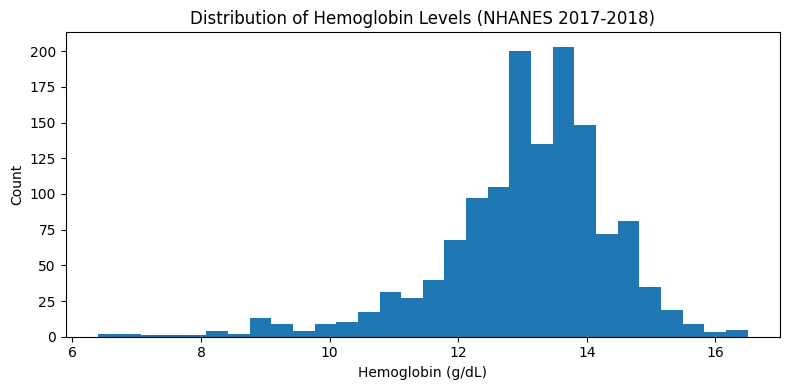

'figures/Distribution_of_Hemoglobin_Levels.png'

In [7]:
# Distribution of hemoglobin (histogram)
plt.figure(figsize=(8, 4))
plt.hist(df_clean["LBXHGB"], bins=30)
plt.title("Distribution of Hemoglobin Levels (NHANES 2017-2018)")
plt.xlabel("Hemoglobin (g/dL)")
plt.ylabel("Count")
plt.tight_layout()
out1 = os.path.join(FIG_DIR, "Distribution_of_Hemoglobin_Levels.png")
plt.savefig(out1, dpi=200)
plt.show()

out1

/tmp/ipython-input-1880229314.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=["Not anemic (0)", "Anemic (1)"])


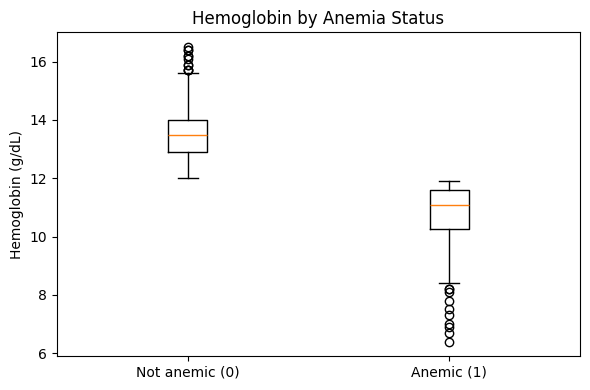

'figures/Hemoglobin_by_Anemia_Status.png'

In [8]:
# Hemoglobin by anemia status (boxplot)
plt.figure(figsize=(6, 4))
data_to_plot = [df_clean.loc[df_clean["anemia"] == 0, "LBXHGB"],
                df_clean.loc[df_clean["anemia"] == 1, "LBXHGB"]]
plt.boxplot(data_to_plot, labels=["Not anemic (0)", "Anemic (1)"])
plt.title("Hemoglobin by Anemia Status")
plt.ylabel("Hemoglobin (g/dL)")
plt.tight_layout()
out2 = os.path.join(FIG_DIR, "Hemoglobin_by_Anemia_Status.png")
plt.savefig(out2, dpi=200)
plt.show()

out2

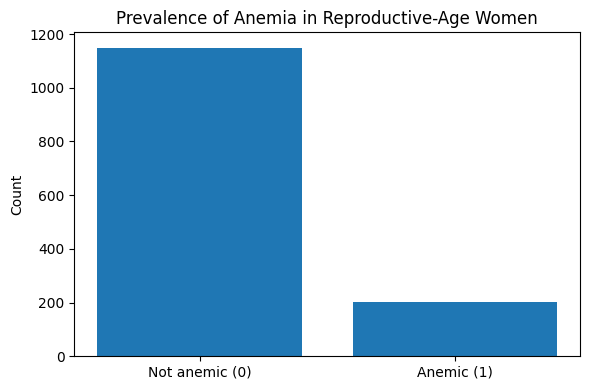

'figures/Prevalence_of_Anemia_in_Reproductive_Age_Women.png'

In [9]:
# Prevalence of anemia (bar chart)
plt.figure(figsize=(6, 4))
plt.bar(["Not anemic (0)", "Anemic (1)"], anemia_counts.values)
plt.title("Prevalence of Anemia in Reproductive-Age Women")
plt.ylabel("Count")
plt.tight_layout()
out3 = os.path.join(FIG_DIR, "Prevalence_of_Anemia_in_Reproductive_Age_Women.png")
plt.savefig(out3, dpi=200)
plt.show()

out3

Midterm Modeling Plan (not final modeling)

At midterm, the goal is to define the modeling strategy and ensure the dataset is ready.

**Planned approach**
- Baseline: Logistic Regression predicting `anemia`
- Compare with a nonlinear model (e.g., Neural Network)
- Evaluate with: accuracy, confusion matrix, sensitivity/recall for anemia

**Next steps (final project)**
- Expand feature set (if available) to include clinically meaningful predictors (e.g., iron intake, pregnancy history, menstruation-related variables, comorbidities)
- Consider class imbalance handling (class weights, threshold tuning, or metrics beyond accuracy such as F1/recall)


In [10]:
# Placeholder: confirm feature set for planned models
features = ["RIDAGEYR", "RIDRETH1"]  # age + race/ethnicity (coded)
target = "anemia"

print("Planned features:", features)
print("Target:", target)

df_clean[features + [target]].head()

Planned features: ['RIDAGEYR', 'RIDRETH1']
Target: anemia


,RIDAGEYR,RIDRETH1,anemia
41,25.0,4.0,0
48,26.0,4.0,0
59,36.0,2.0,0
67,41.0,3.0,0
68,47.0,5.0,0
